# Google Stock Price Data (2020-2025)

This dataset includes the daily historical stock prices for Google (GOOGL) spanning from 2020 to 2025. It features essential financial metrics such as opening and closing prices, daily highs and lows, adjusted close prices, and trading volumes. The information offers valuable insights into the stock's performance over a five-year timeframe.

## Column Descriptions:

Price: Date of the stock data (needs cleaning as the first two rows are headers).

Adj Close: Adjusted closing price, accounting for events like dividends and splits.

Close: Closing price of the stock at the end of the trading day.

High: Highest price of the stock during the trading day.

Low: Lowest price of the stock during the trading day.

Open: Opening price of the stock at the start of the trading day.

Volume: Number of shares traded during the day.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.api.models import Sequential
from keras.api.layers import Dense,LSTM,RNN,Dropout,Input
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

In [117]:
df = pd.read_csv('data/googl_data_2020_2025.csv')
df

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
...,...,...,...,...,...,...,...
1255,2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
1256,2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
1257,2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700


In [118]:
df.isnull().sum()

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64

In [119]:
df = df.dropna(axis=0,how='any')
df

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
5,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
...,...,...,...,...,...,...,...
1255,2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
1256,2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
1257,2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700


In [120]:
df = df.drop(df.index[0],axis=0)
df

,Price,Adj Close,Close,High,Low,Open,Volume
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
5,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
6,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000
...,...,...,...,...,...,...,...
1255,2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
1256,2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
1257,2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700


In [121]:
df['Price'] = pd.to_datetime(df['Price'])
df = df.sort_values(by='Price')
df = df.set_index('Price')
df

,Adj Close,Close,High,Low,Open,Volume
Price,,,,,,
2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000
...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  1258 non-null   object
 1   Close      1258 non-null   object
 2   High       1258 non-null   object
 3   Low        1258 non-null   object
 4   Open       1258 non-null   object
 5   Volume     1258 non-null   object
dtypes: object(6)
memory usage: 68.8+ KB


In [123]:
def apply_float(val):
    return np.float32(val)

In [124]:
for col in df.columns:
    df[col] = df[col].apply(apply_float)

In [125]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.0
mean,118.684967,119.075615,120.378052,117.722649,119.004593,33087950.0
std,32.403072,32.453266,32.688267,32.248276,32.481361,14617583.0
min,52.516125,52.706501,53.345501,50.443501,52.818501,9312000.0
25%,93.608171,93.947502,95.272123,92.305002,93.832497,23439375.0
50%,119.267639,119.699997,121.044502,118.626247,119.712502,29433000.0
75%,140.598320,141.107998,142.101002,139.796120,140.996876,37735150.0
max,196.660004,196.660004,201.419998,194.979996,197.250000,123200000.0


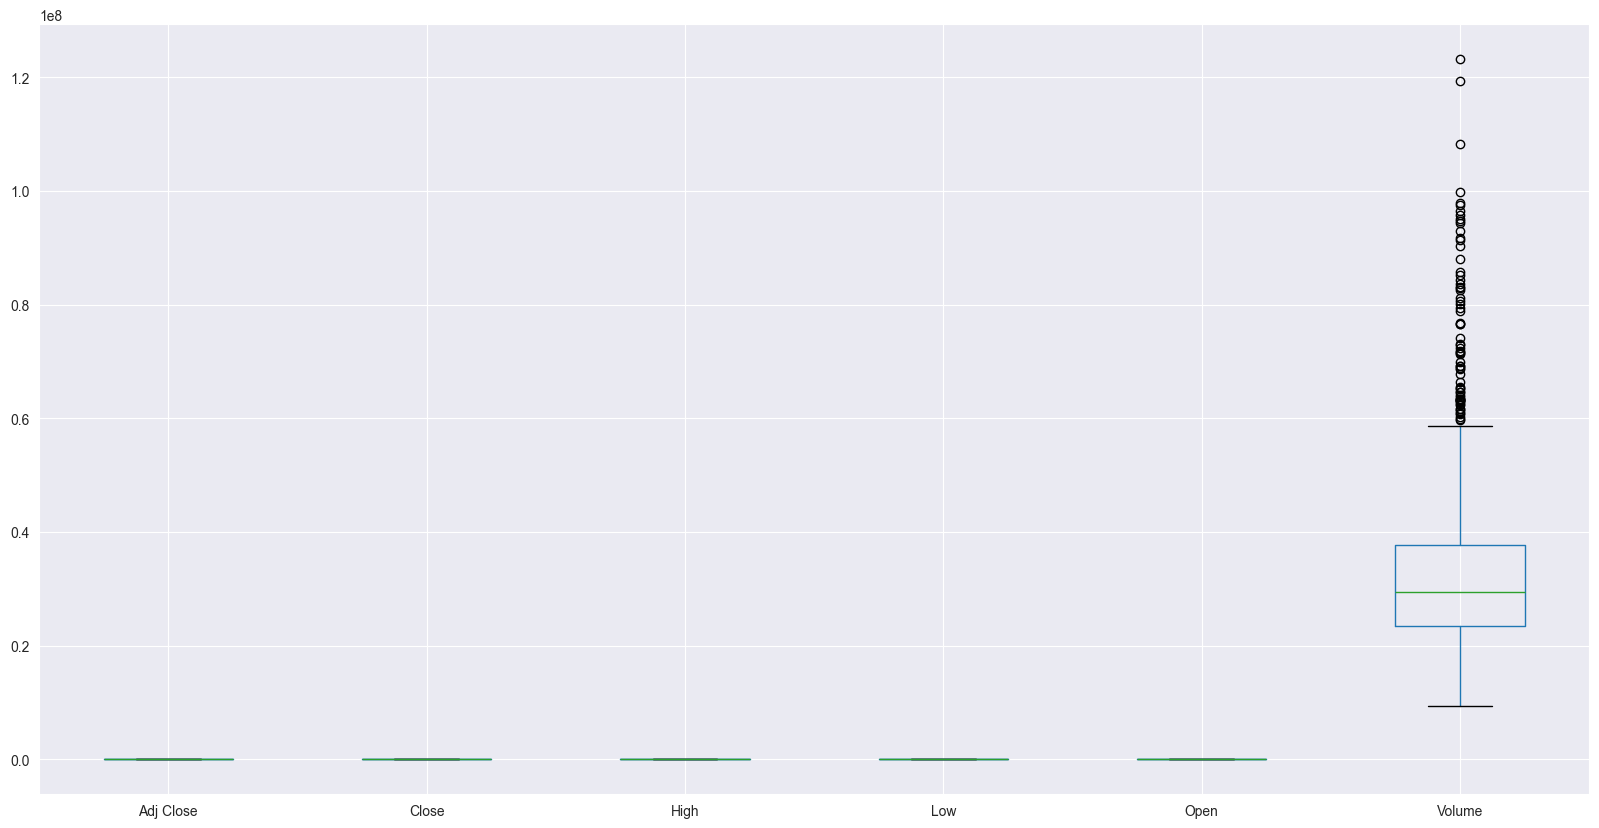

In [126]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

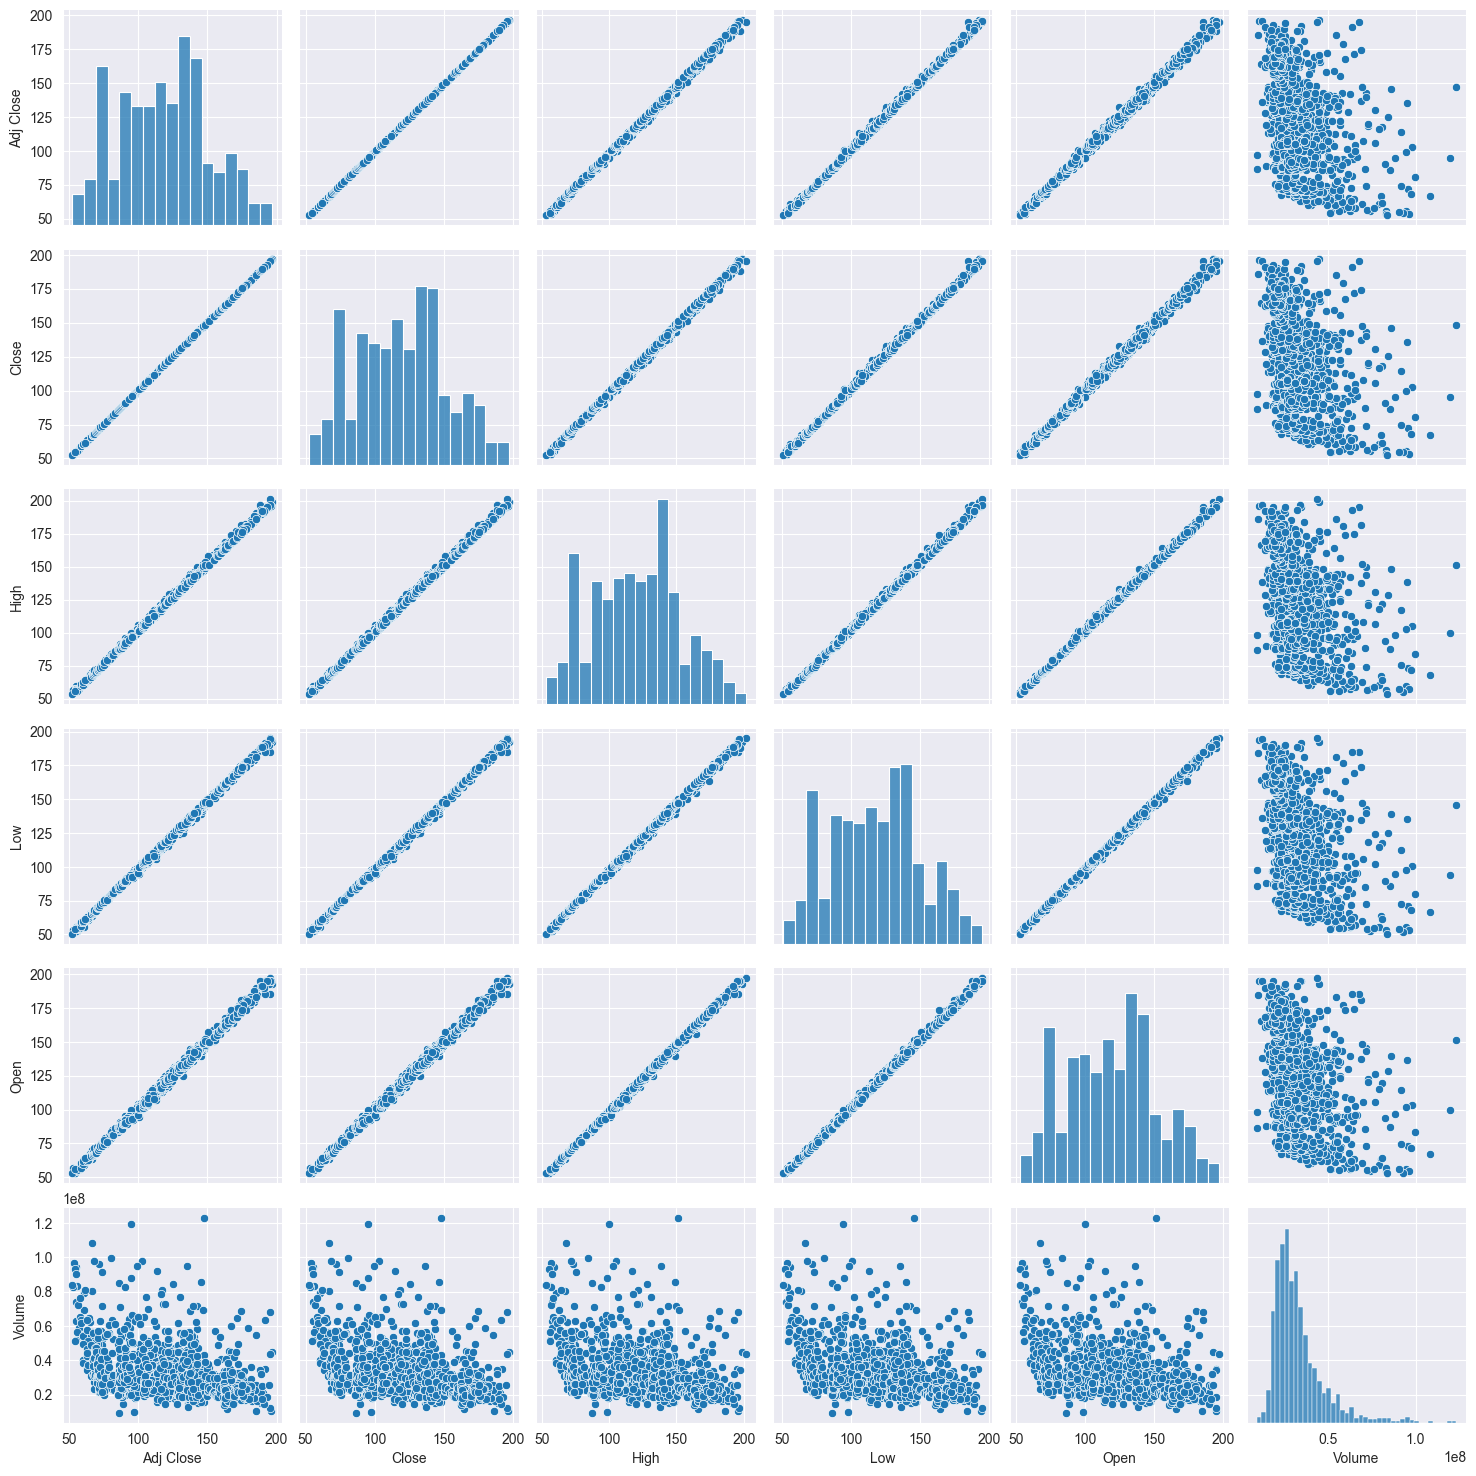

In [127]:
sns.pairplot(df)

<Axes: >

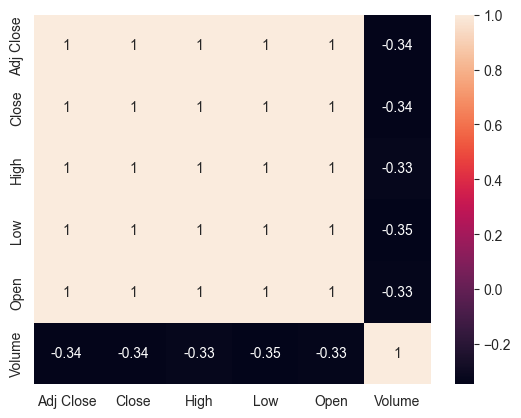

In [128]:
sns.heatmap(df.corr(),annot=True)

In [129]:
df = df.drop(columns=['Open','High','Low','Adj Close','Volume'],axis=1)
df

,Close
Price,
2020-01-02 00:00:00+00:00,68.433998
2020-01-03 00:00:00+00:00,68.075996
2020-01-06 00:00:00+00:00,69.890503
2020-01-07 00:00:00+00:00,69.755501
2020-01-08 00:00:00+00:00,70.251999
...,...
2024-12-24 00:00:00+00:00,196.110001
2024-12-26 00:00:00+00:00,195.600006
2024-12-27 00:00:00+00:00,192.759995


In [130]:
columns = df.columns
for i in range(1,5):
    for col in columns:
        df[f'{col}_shift_-{i}'] = df[col].shift(i)

df.dropna(inplace=True)

In [131]:
df

,Close,Close_shift_-1,Close_shift_-2,Close_shift_-3,Close_shift_-4
Price,,,,,
2020-01-08 00:00:00+00:00,70.251999,69.755501,69.890503,68.075996,68.433998
2020-01-09 00:00:00+00:00,70.989502,70.251999,69.755501,69.890503,68.075996
2020-01-10 00:00:00+00:00,71.447998,70.989502,70.251999,69.755501,69.890503
2020-01-13 00:00:00+00:00,72.001503,71.447998,70.989502,70.251999,69.755501
2020-01-14 00:00:00+00:00,71.529503,72.001503,71.447998,70.989502,70.251999
...,...,...,...,...,...
2024-12-24 00:00:00+00:00,196.110001,194.630005,191.410004,188.509995,188.399994
2024-12-26 00:00:00+00:00,195.600006,196.110001,194.630005,191.410004,188.509995
2024-12-27 00:00:00+00:00,192.759995,195.600006,196.110001,194.630005,191.410004


## Training

In [132]:
X,y = df.drop(columns='Close',axis=1),df['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [133]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
scaler_1 = MinMaxScaler()
y_train = scaler_1.fit_transform(y_train.to_numpy().reshape(-1,1))

In [135]:
X_train = X_train.reshape(X_train.shape[0],4,(X_train.shape[1]//4))
X_test = X_test.reshape(X_test.shape[0],4,(X_test.shape[1]//4))

In [136]:
from keras.src.layers import LSTMCell

model = Sequential([
    Input((X_train.shape[1],X_train.shape[2])),
    LSTM(units=32,return_sequences=True),
    Dropout(0.1),
    LSTM(units=16,activation='relu',return_sequences=True),
    RNN(LSTMCell(8),return_sequences=False),
    Dense(units=1,activation='linear')
])

In [137]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 4, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 4, 16)          │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (RNN)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,297 (32.41 KB)

 Trainable params: 8,297 (32.41 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error","r2_score"],
)

In [139]:
history = model.fit(X_train,y_train, validation_split=0.2, epochs=10, batch_size=16, shuffle=False)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1032 - mean_squared_error: 0.1032 - r2_score: -9.9694 - val_loss: 0.0063 - val_mean_squared_error: 0.0063 - val_r2_score: 0.5509
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - r2_score: -15.6514 - val_loss: 0.0034 - val_mean_squared_error: 0.0034 - val_r2_score: 0.7588
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - r2_score: -9.4201 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_r2_score: 0.8848
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_squared_error: 0.0213 - r2_score: -5.7594 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_r2_score: 0.8649
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - r2_score: -2.2517 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_r2_score: 0.7921
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

<Axes: >

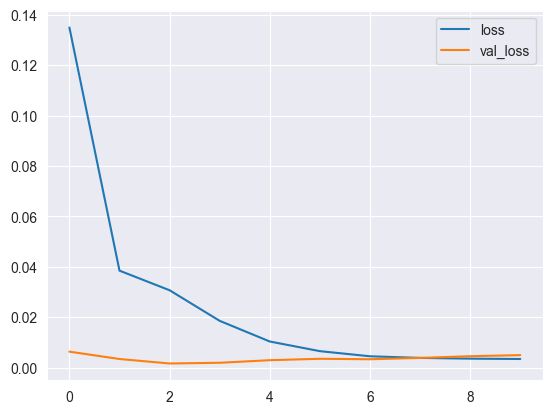

In [140]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [141]:
prediction = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [142]:
pred_y = scaler_1.inverse_transform(prediction)

In [143]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_y)}')
print(f'R2 Score: {r2_score(y_test, pred_y)}')

Mean Squared Error: 370.8301086425781
R2 Score: -0.5841602087020874


<Axes: xlabel='Price'>

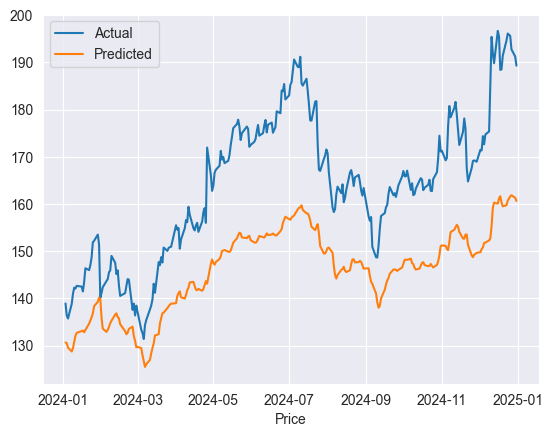

In [144]:
sns.lineplot(x=y_test.index, y=y_test.values.ravel(), label='Actual')
sns.lineplot(x=y_test.index,y=pred_y.flatten(),label='Predicted')